## Youtube Trending Videos Analysis

### Goals of the analysis  
We want to answer questions like:    

- How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?  

- The same questions above, but applied to likes and comment count instead of views.  
- Which video remained the most on the trendin-videos list?  
- How many trending videos contain a fully-capitalized word in their titles?  
- What are the lengths of trending video titles? Is this length related to the video becoming trendy?  
- How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?  
- What are the most common words in trending video titles?  
- Which YouTube channels have the largest number of trending videos?  
- Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?  
- When were trending videos published? On which days of the week? at which times of the day?

*Let's get started!*

__Importing some packages__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import datetime 
import wordcloud
import json


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

__Reading the dataset__

In [3]:
df = pd.read_csv('USvideos.csv')

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.shape

(40949, 16)

__Data Cleaning__

In [6]:
df[df['description'].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [7]:
df['description'] = df['description'].fillna(value="")

In [8]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

In [9]:
cdf

,year,No_of_videos
0,2018,31349
1,2017,9600


In [10]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

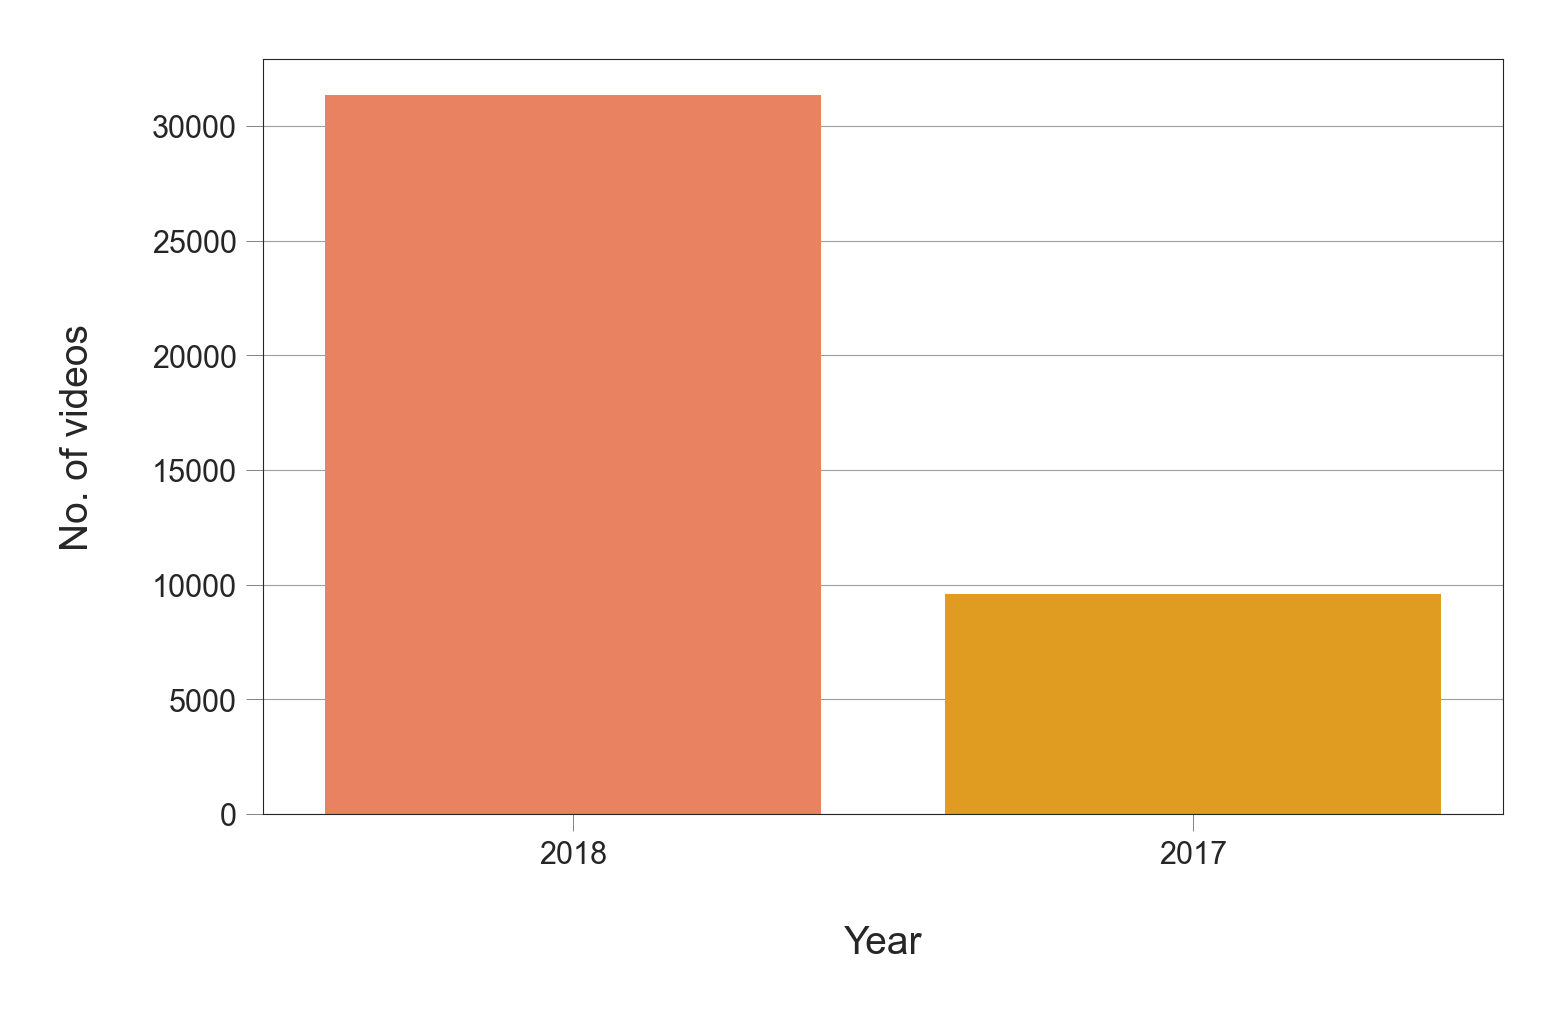

In [11]:
fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [12]:
df['trending_date'].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

__Describtion of numerical columns__

In [13]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


From table above that:  
- The average number of views of a trending video is 2.3660.784. The median value for the number of views is 681.861.  
- The average number of likes of  trending video is 74.266, and dislike is 3.711.  
- The average comment count is 8446, while the mean is 1.856.

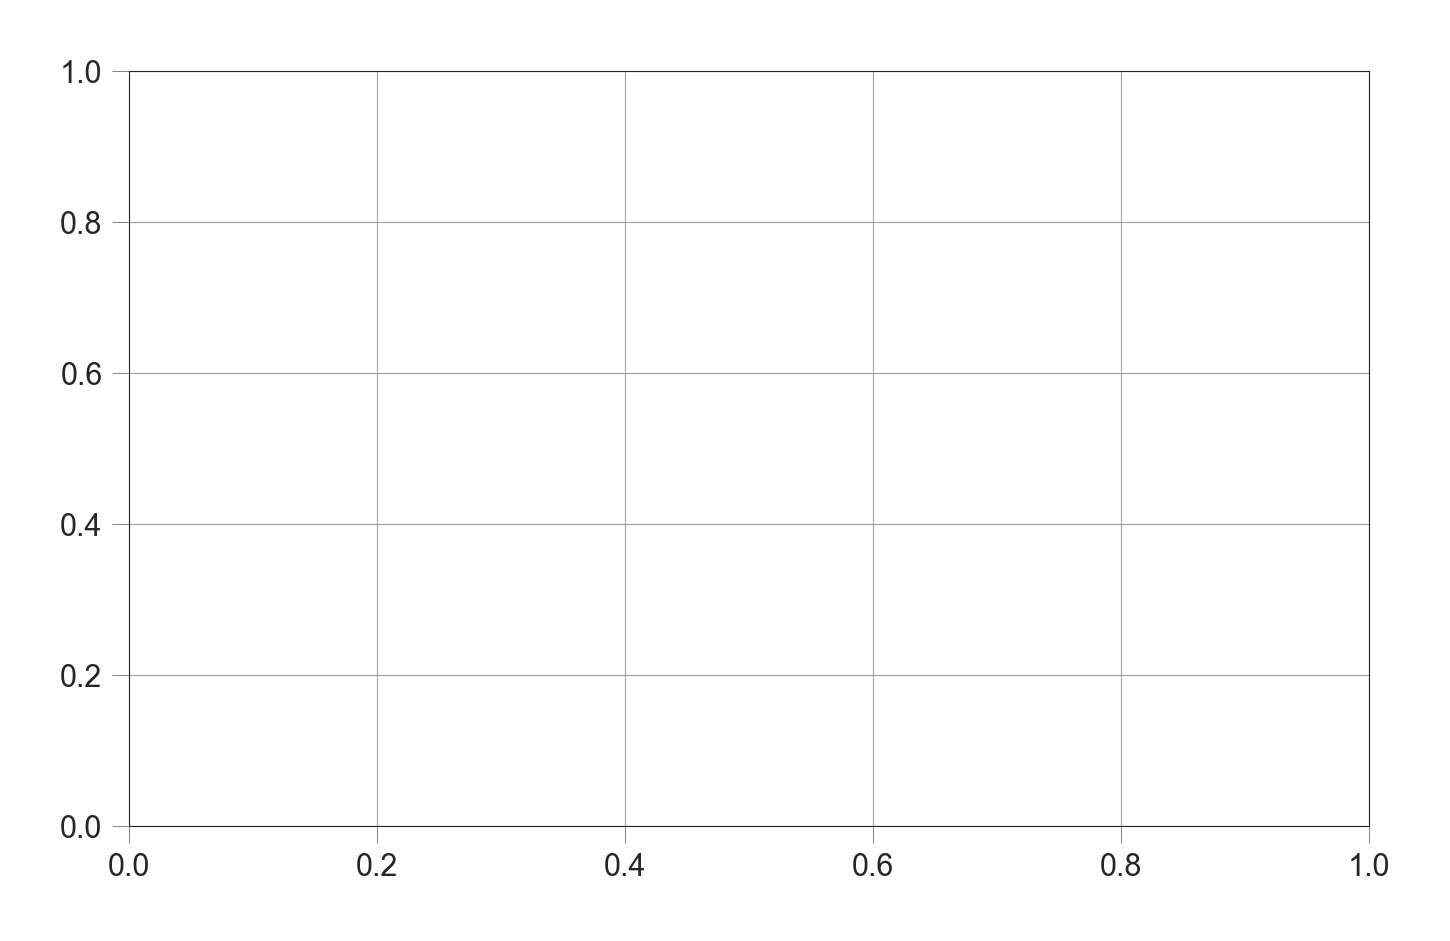

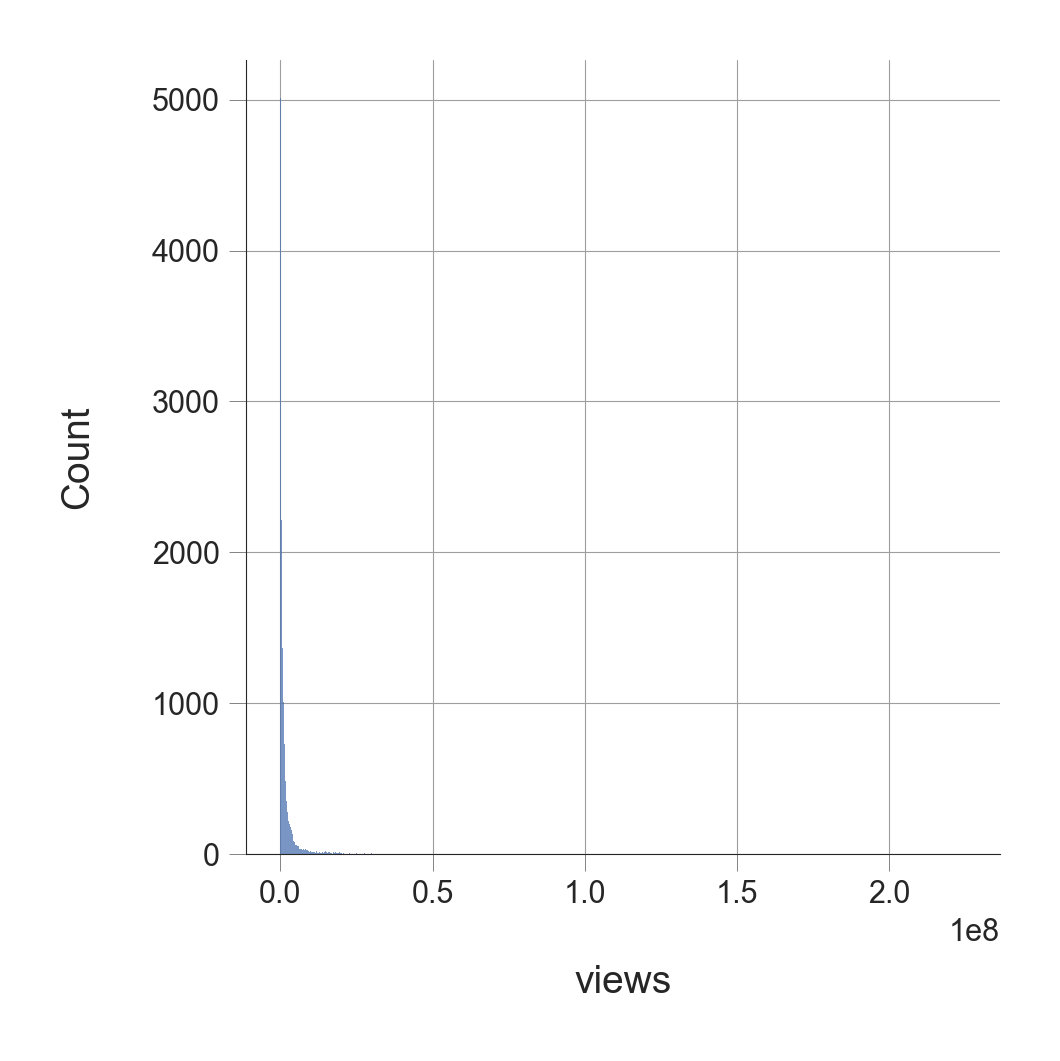

In [14]:
fig, ax = plt.subplots()
_ = sns.displot(df['views'], kde=False)

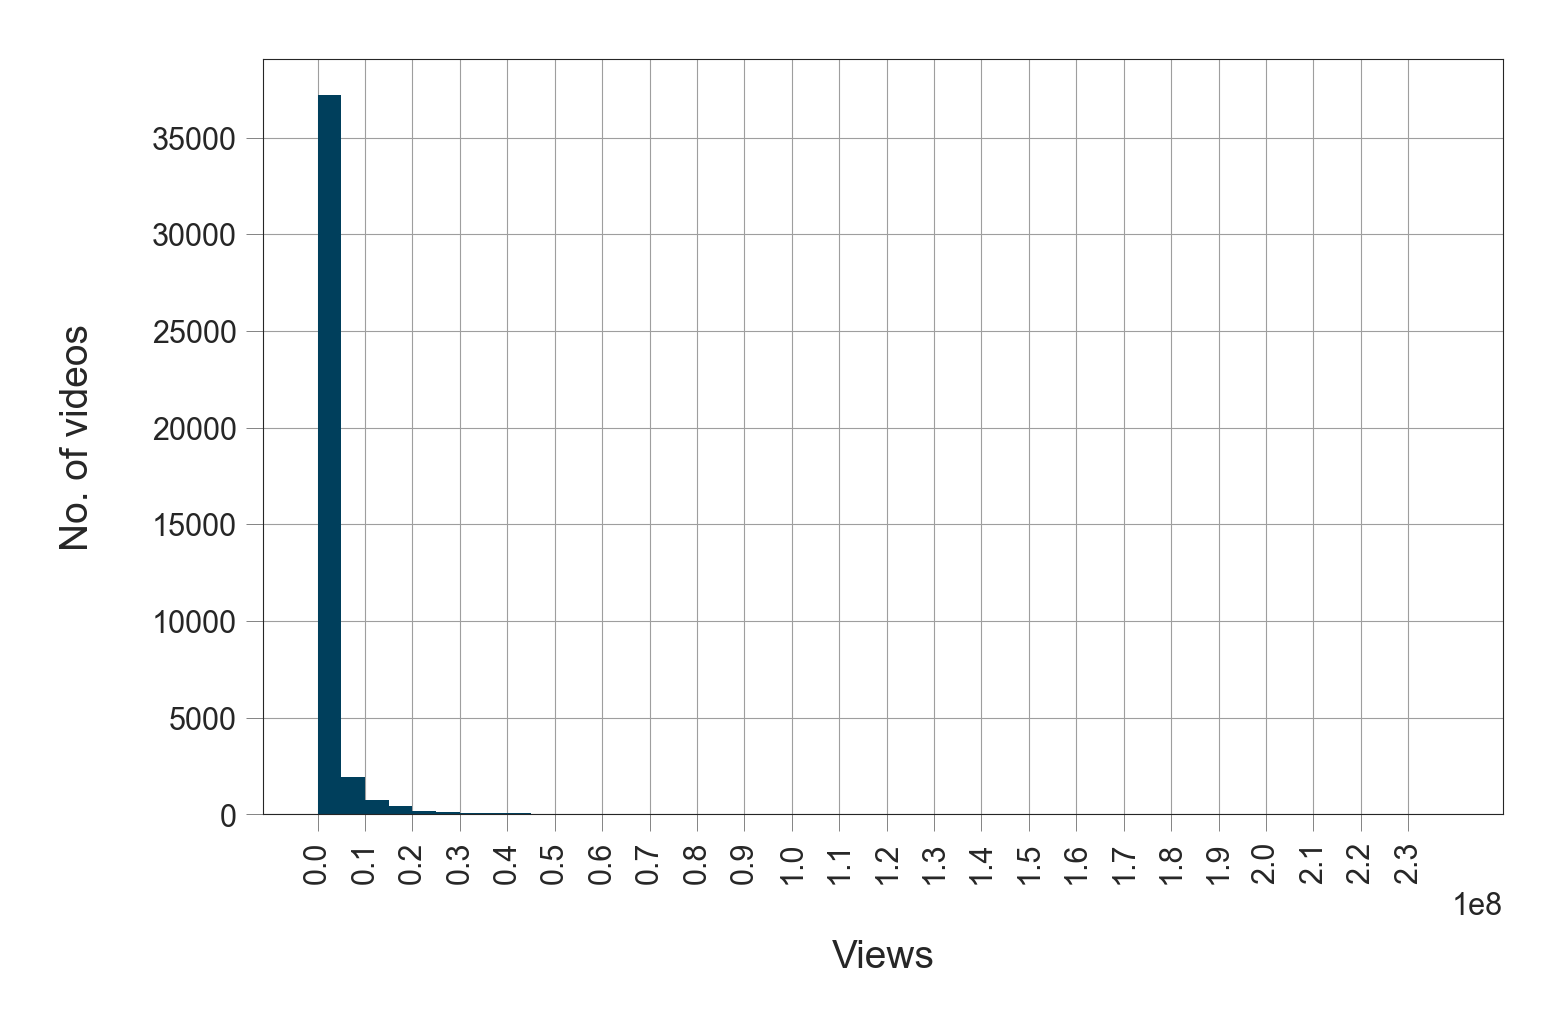

In [15]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

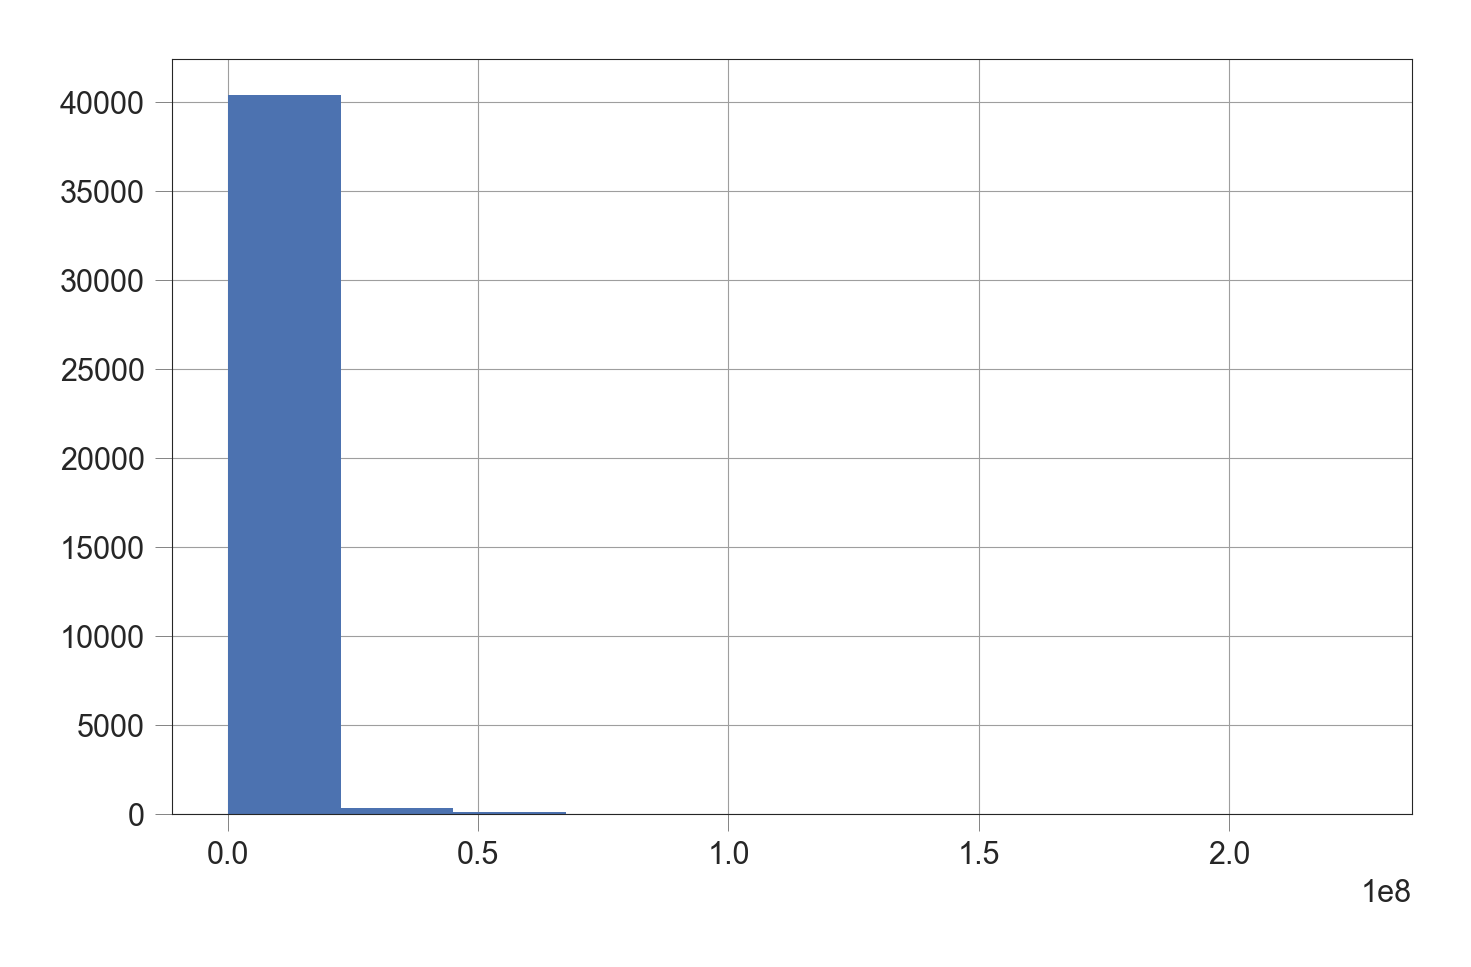

In [16]:
df['views'].hist();

Let's plot the histogram just for videos <= 25 million views

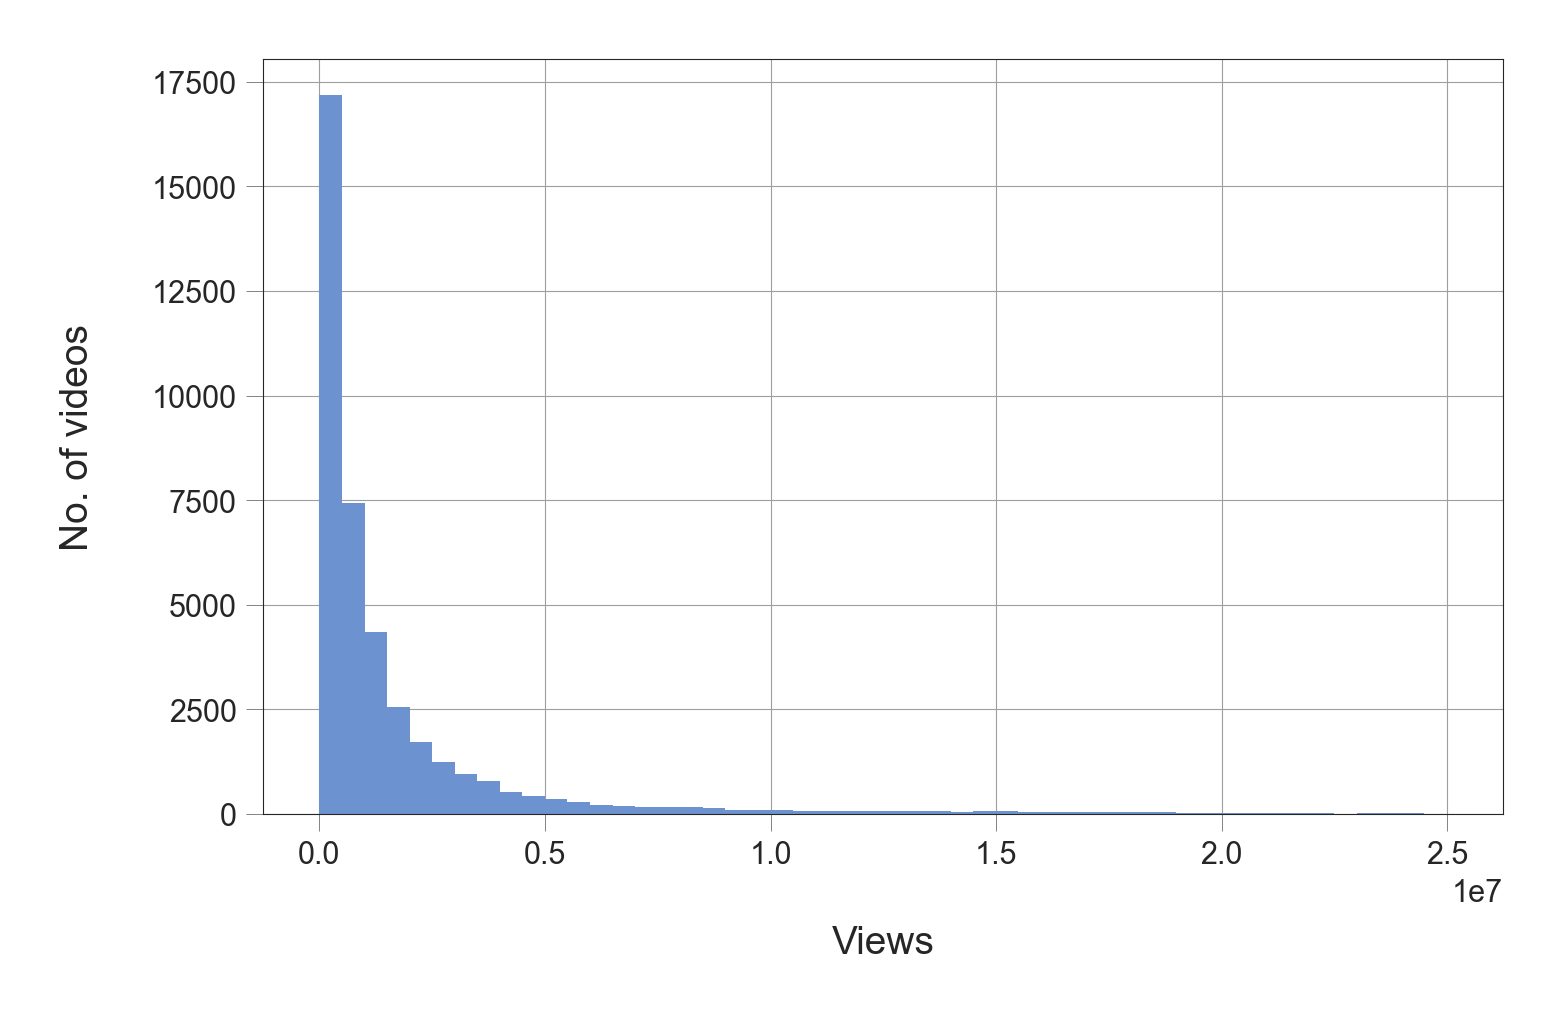

In [17]:
fig, ax = plt.subplots()
_=sns.distplot(df[df['views'] < 25e6]['views'], kde=False, color='#6D92D0', hist_kws={'alpha': 1}, ax=ax)
_=ax.set(xlabel="Views", ylabel='No. of videos')

In [18]:
#The percentage of videos less than 1 million views
df[df['views'] < 1e6]['views'].count() / df['views'].count() *100

60.09426359618062

In [19]:
#The percentage of videos less than 1.5 million views
df[df['views'] < 1.5e6]['views'].count() / df['views'].count() *100

70.74653837700554

In [20]:
#The percentage of videos less than 5 million views
df[df['views'] < 5e6]['views'].count() / df['views'].count() *100

90.81052040342865

__Likes histogram__

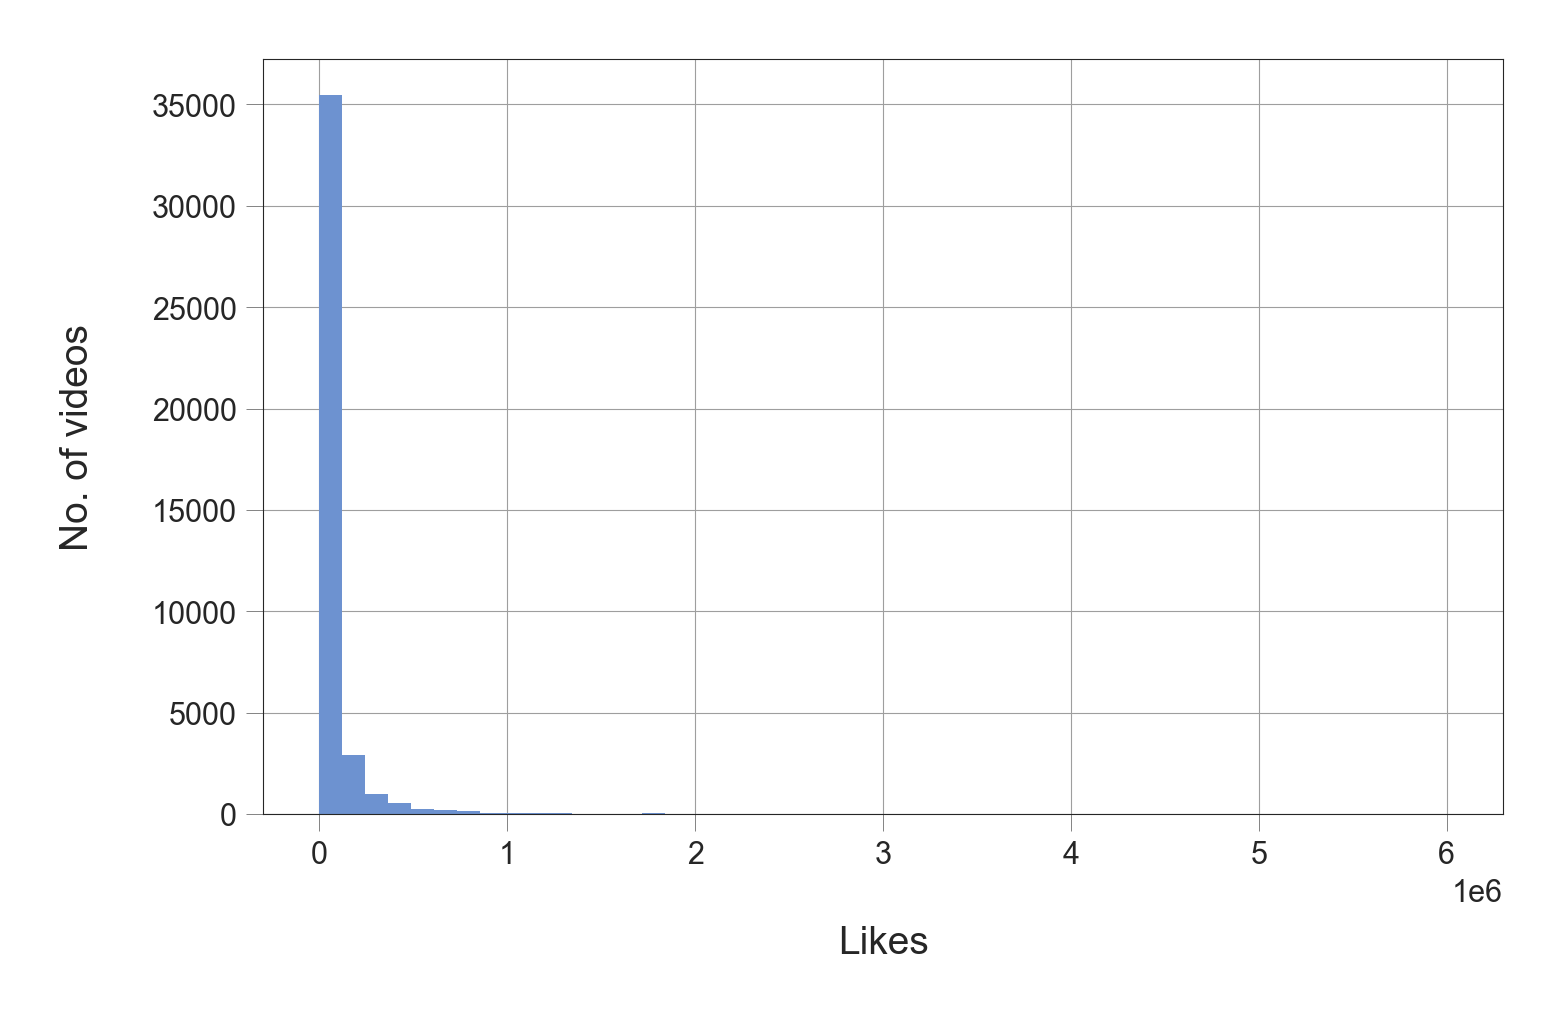

In [21]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_= sns.distplot(df['likes'], kde=False, color='#6D92D0',hist_kws={'alpha':1}, bins=np.linspace(0, 6000000), ax=ax)
_= ax.set(xlabel='Likes', ylabel='No. of videos')

Almost the trending videos have been 0 and 100000 likes. So we plot the histogram just for videos with 100.000 likes to get closer look at the distribution of the data.

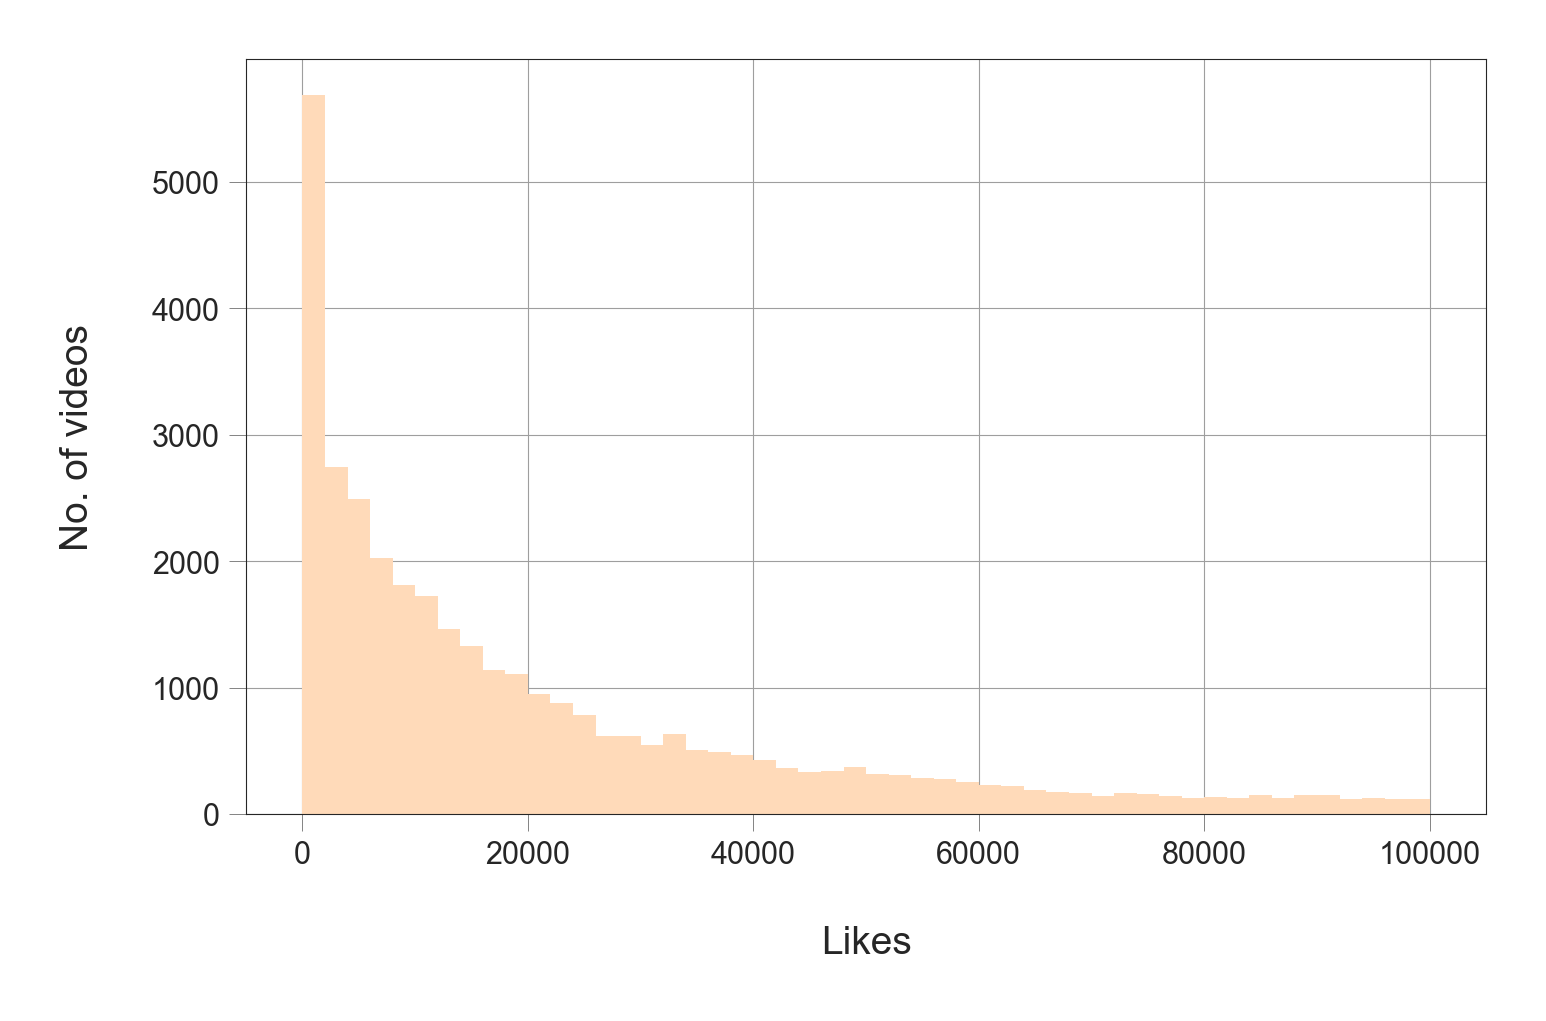

In [22]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df['likes']<=1e5]['likes'], kde=False, color='#FFDAB9', hist_kws={'alpha':1}, ax=ax)
_= ax.set(xlabel='Likes', ylabel='No. of videos')

We can see that the majority of trending videos have < 40000 likes.   
Let's see the exactly percentage of videos with less than 40000 likes

In [23]:
df[df['likes'] < 40000]['likes'].count() / df['likes'].count() * 100

68.4900730176561

__Comment count histogram__

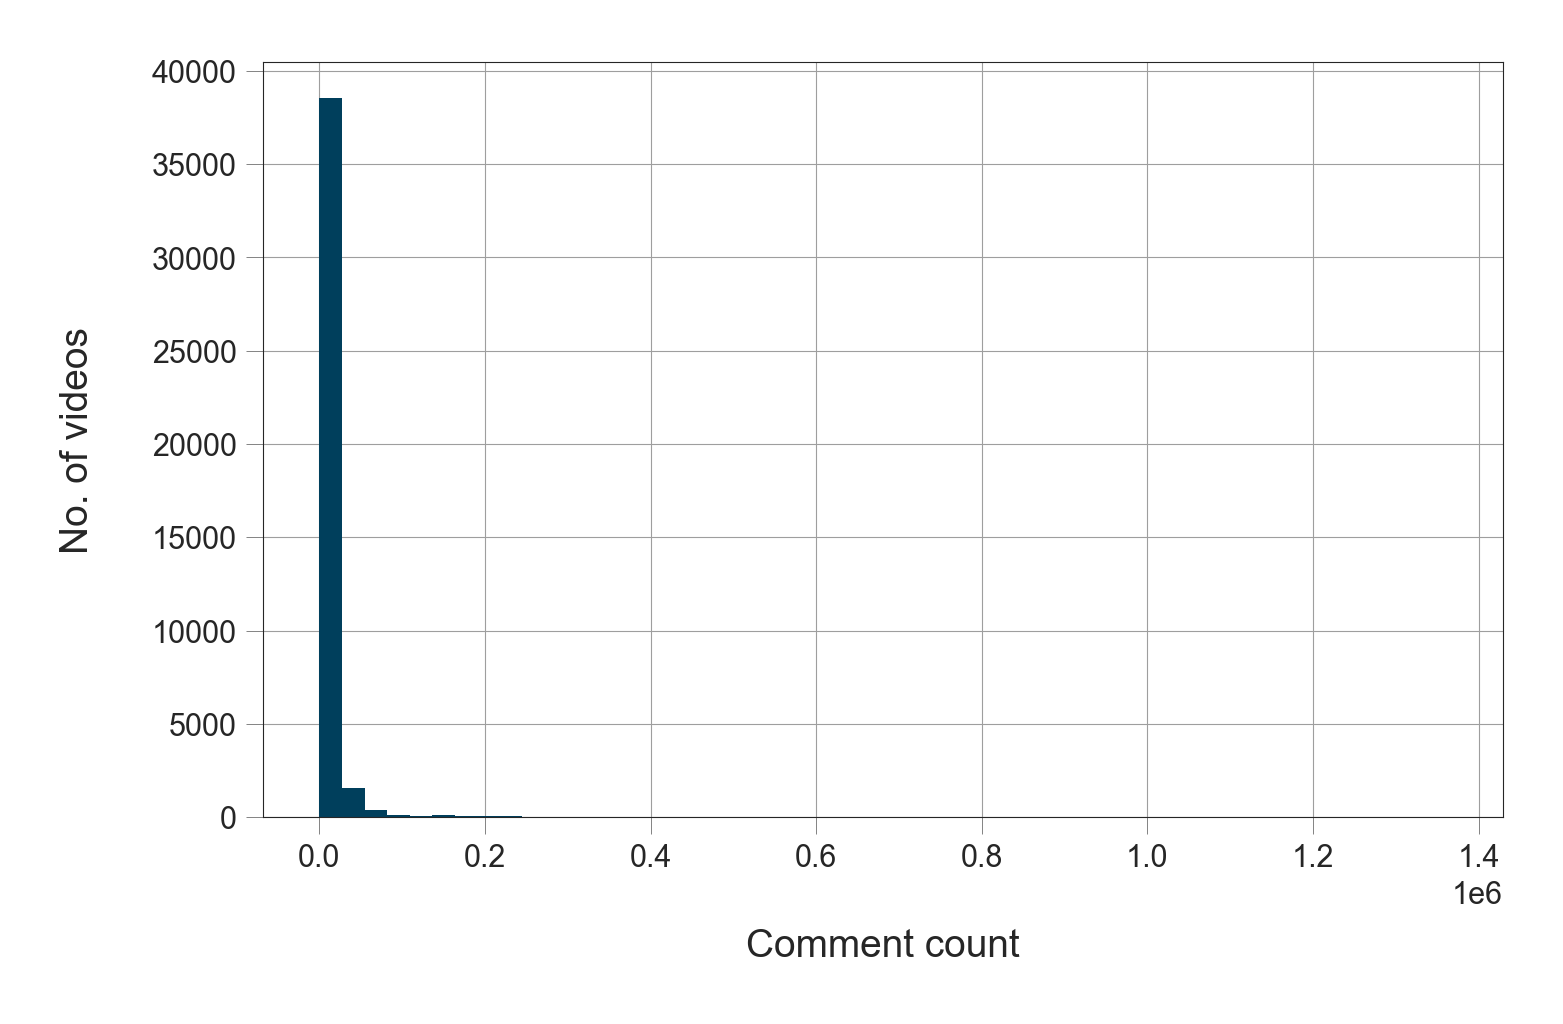

In [24]:
fig, ax = plt.subplots()
_ = sns.distplot(df['comment_count'], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha':1}, ax=ax)
_ = ax.set(xlabel='Comment count', ylabel='No. of videos')

Let's get closer with comment count < 20.000

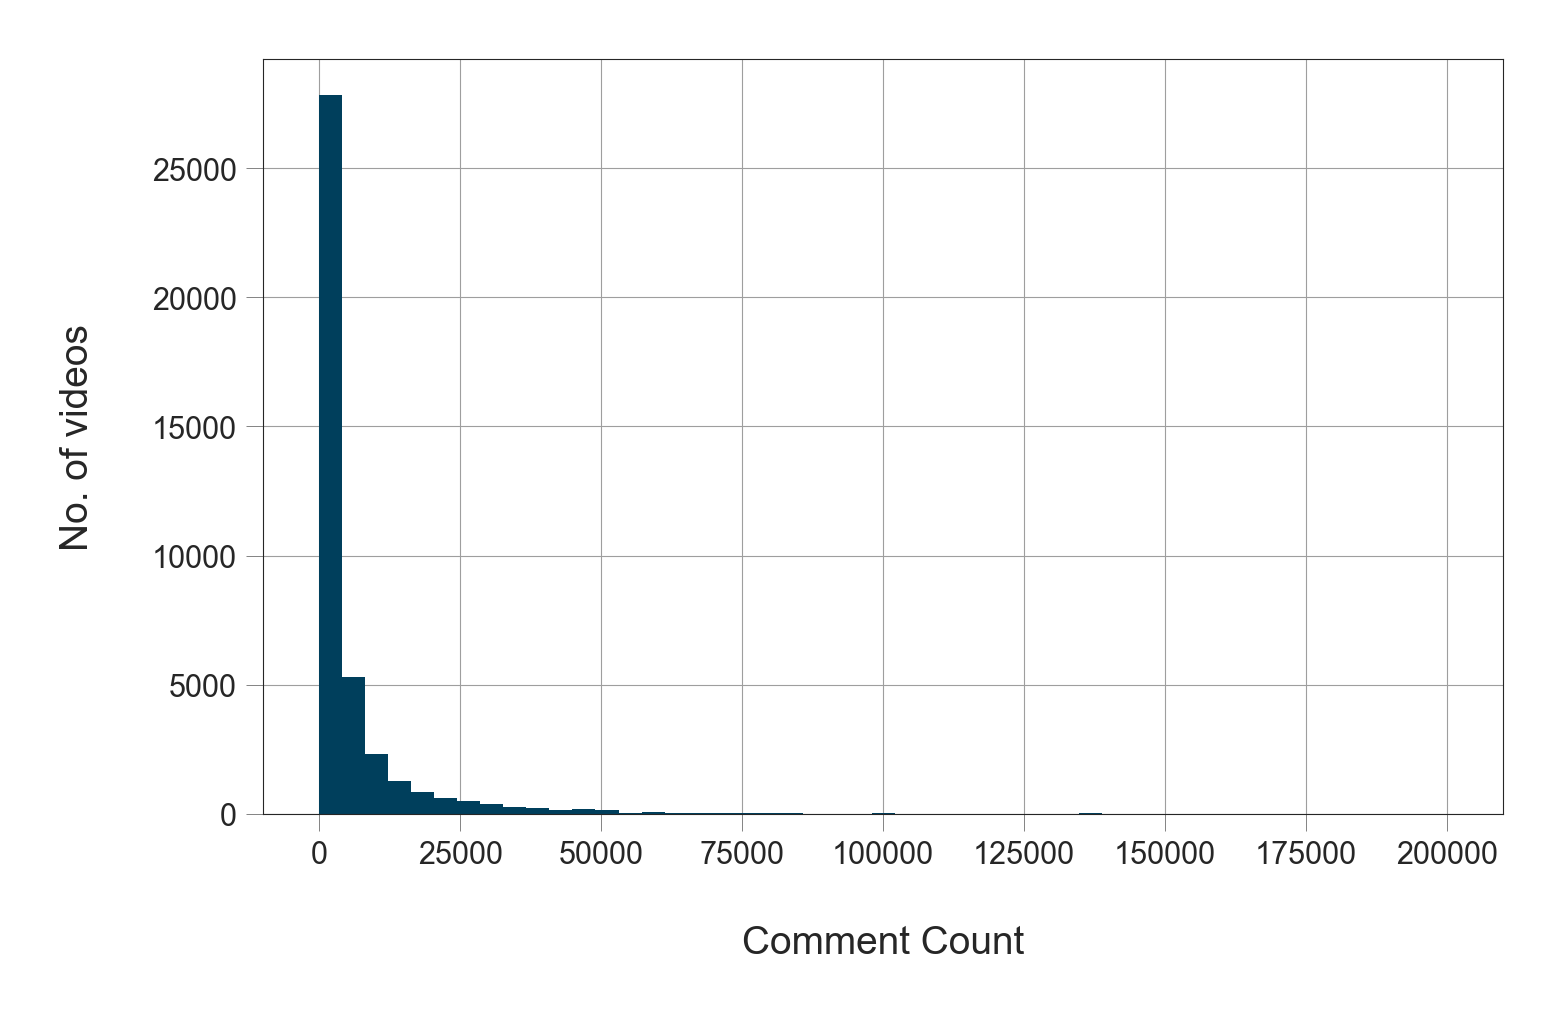

In [25]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df['comment_count'] < 200000]['comment_count'], kde =False, rug = False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                    bins=np.linspace(0, 2e5), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

__Description on non - numerical columns__

In [29]:
df.describe(include= ['O']) #object dtype

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570


There are 40949 videos, but there are only 6351 unique videos => Some videos appeared on the trending videos list on more than one day.  
The top frequent title is WE MADE OUR MOM CRY...HER DREAM CAME TRUE! and that it appeered 30 times on the trending videos list.  
Some diffenrent videos published at the same time (6351 unique videos but only 6269 publish time)

In [30]:
grouped = df.groupby('video_id')
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)
wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...


We can see that this video appeared on the list with 2 different titles.

__How many trending video titles contain capitalized word?__

We will add a new column to the dataset, whose value is True if the title has at least a capitalized word in it, and false otherwise

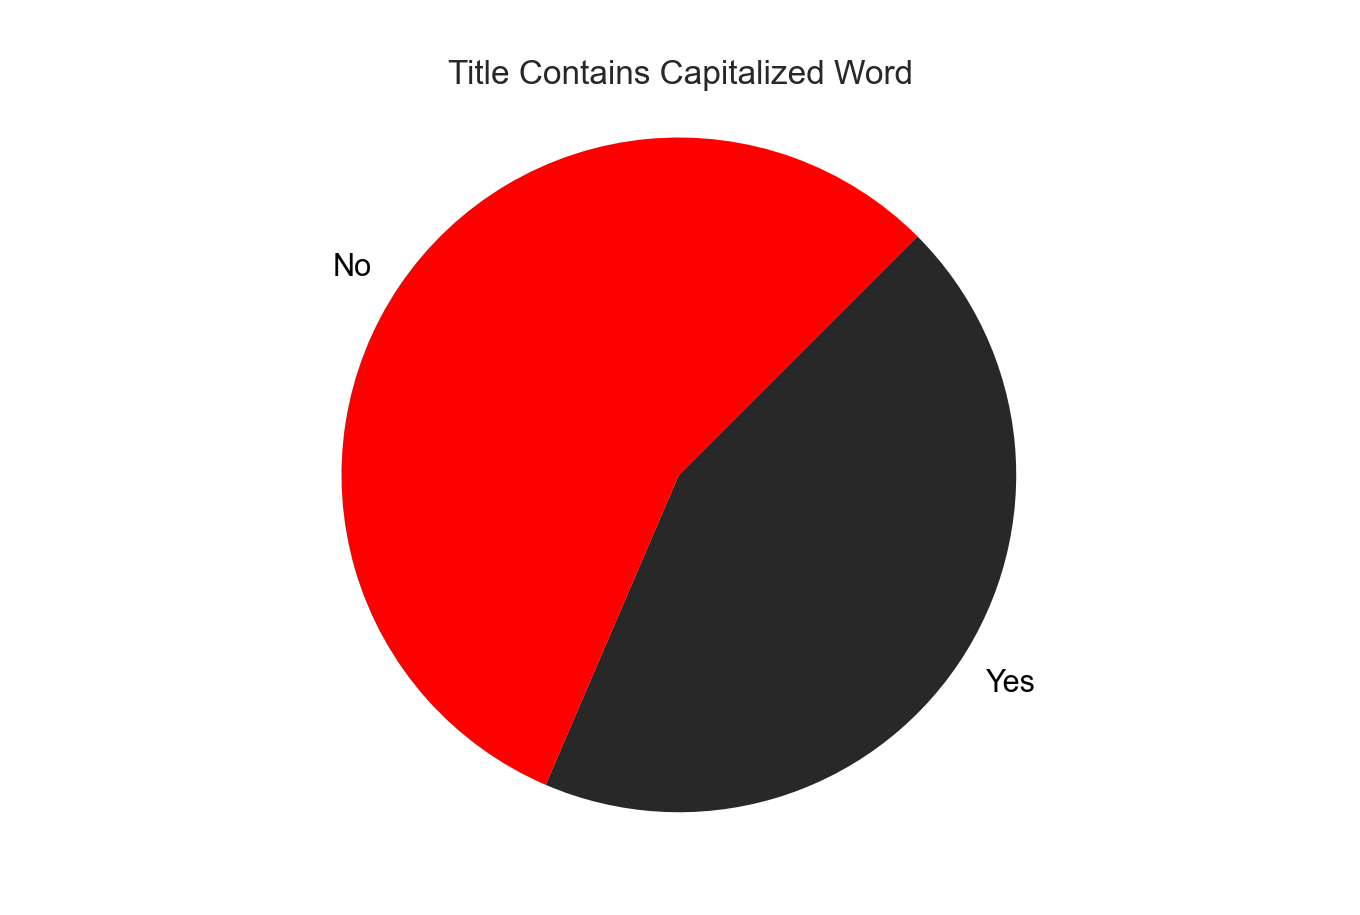

In [32]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df['contains_capitalized'] = df['title'].apply(contains_capitalized_word)
value_counts = df['contains_capitalized'].value_counts().to_dict()

fig, ax =plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
            colors=['#FF0000', '#282828'], textprops={'color': '#040204'}, startangle=45)

_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word')


In [33]:
df['contains_capitalized'].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

We can see that 44% of trending video titles contain at least a capitalized word.

__Video title lengths__

let's add another column to represent the leght of each video title, then plot the histogram of title length to get an idea about the lengths ò trending video titles.

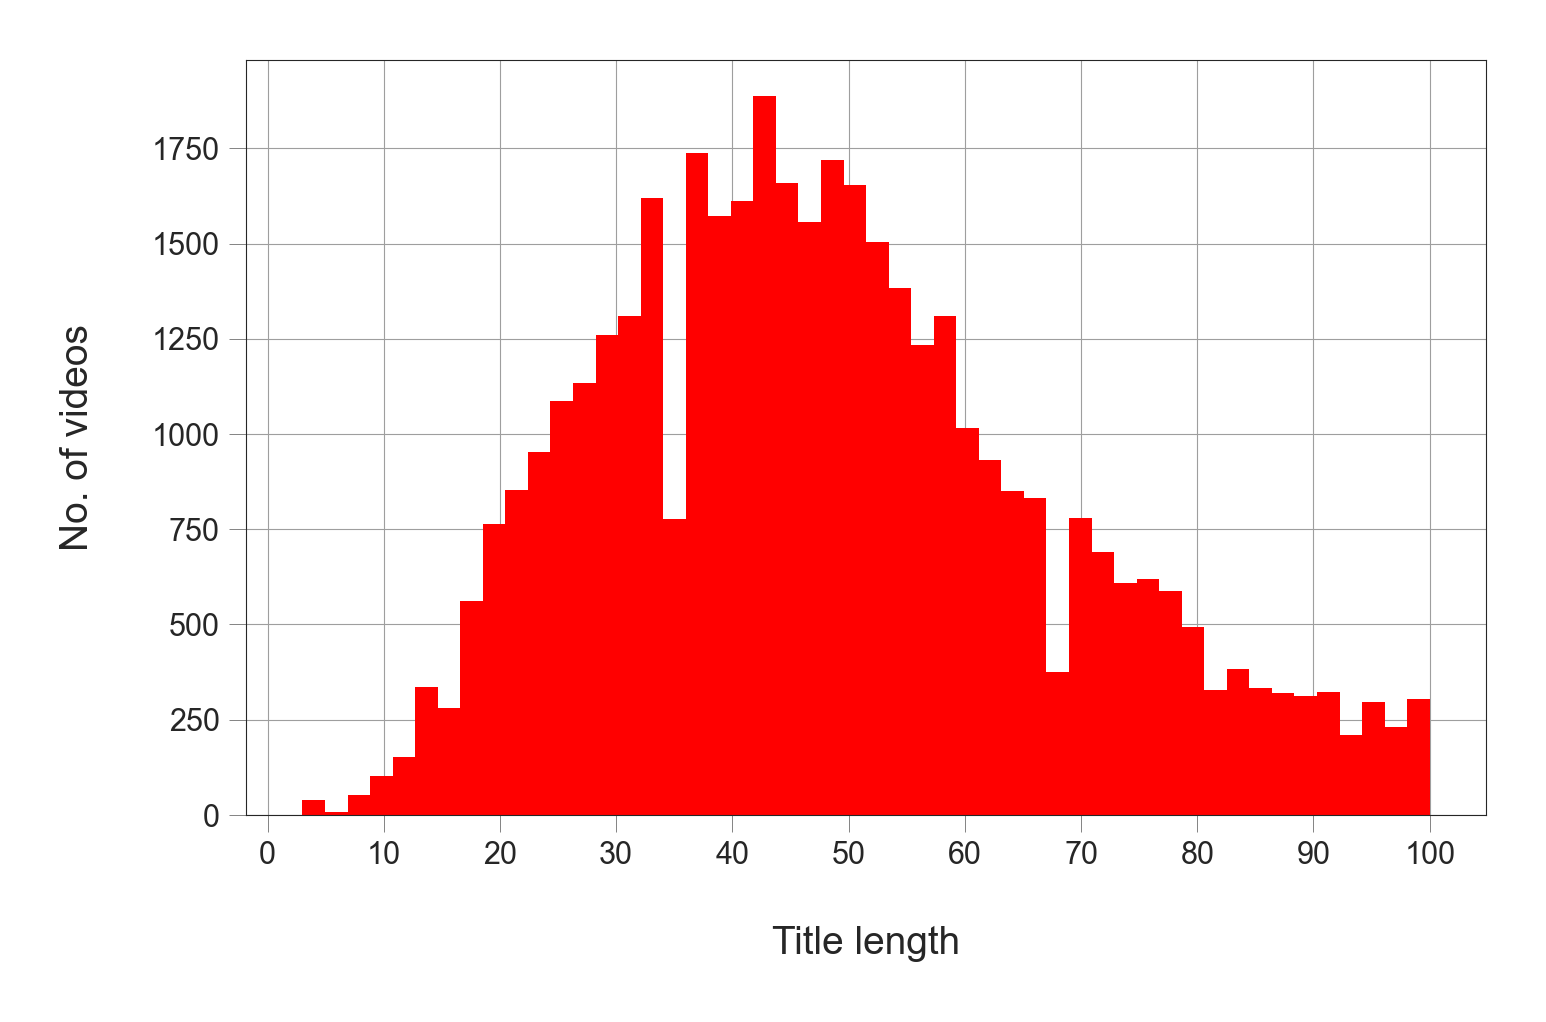

In [35]:
df['title_length'] = df['title'].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df['title_length'], kde=False, rug=False, color='#FF0000', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel='Title length', ylabel='No. of videos', xticks=range(0, 110, 10))

We can see that most videos have title length between 30 and 60 character.  
Let's draw a scater plot between title length and number of views to see the relationship between these 2 variables

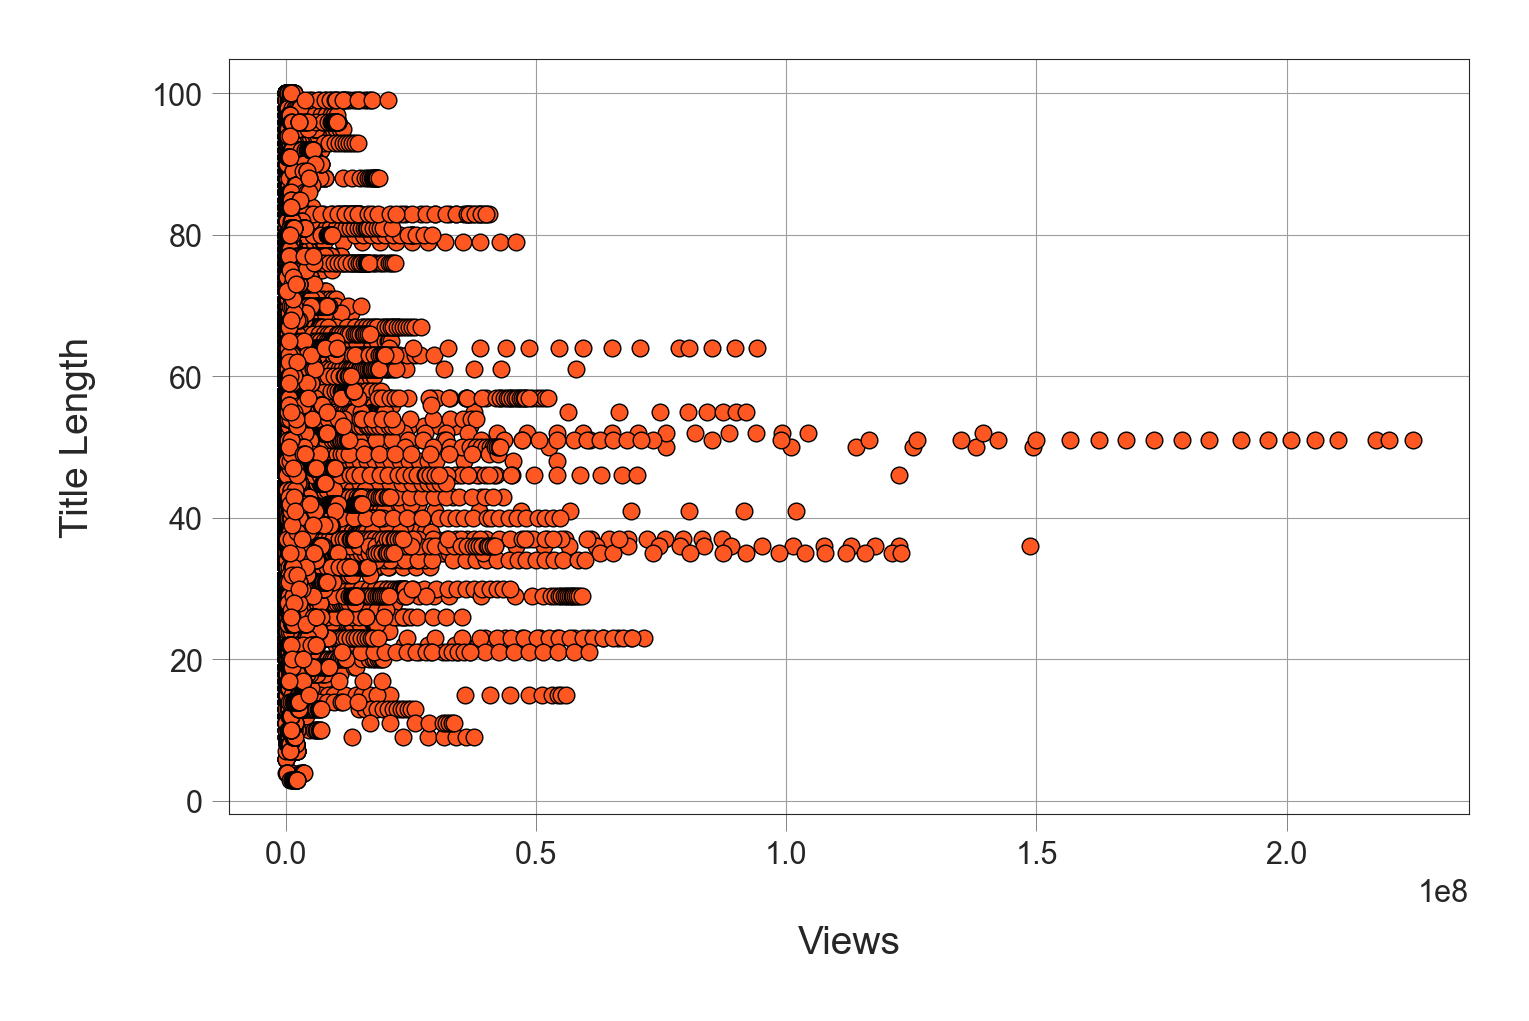

In [43]:
fig, ax=plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors='#000000', linewidths=0.5)
_ = ax.set(xlabel='Views', ylabel='Title Length')

As we can see, there is no relationship between the title length and the number of views. But videos tha have more than 100.000.000 views have title length between 30 and 55 characters approximately.

__Correlation between dataset variables__  

In [44]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.02,-0.01
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,1.00,0.13
title_length,0.02,-0.04,-0.08,-0.03,-0.07,0.03,0.00,-0.01,0.13,1.00


- Views and likes are highly positively correlated with a correlation value of 0.85.  
- Likes and comment count (0.8).  
- Dislikes and comment count (0.7).

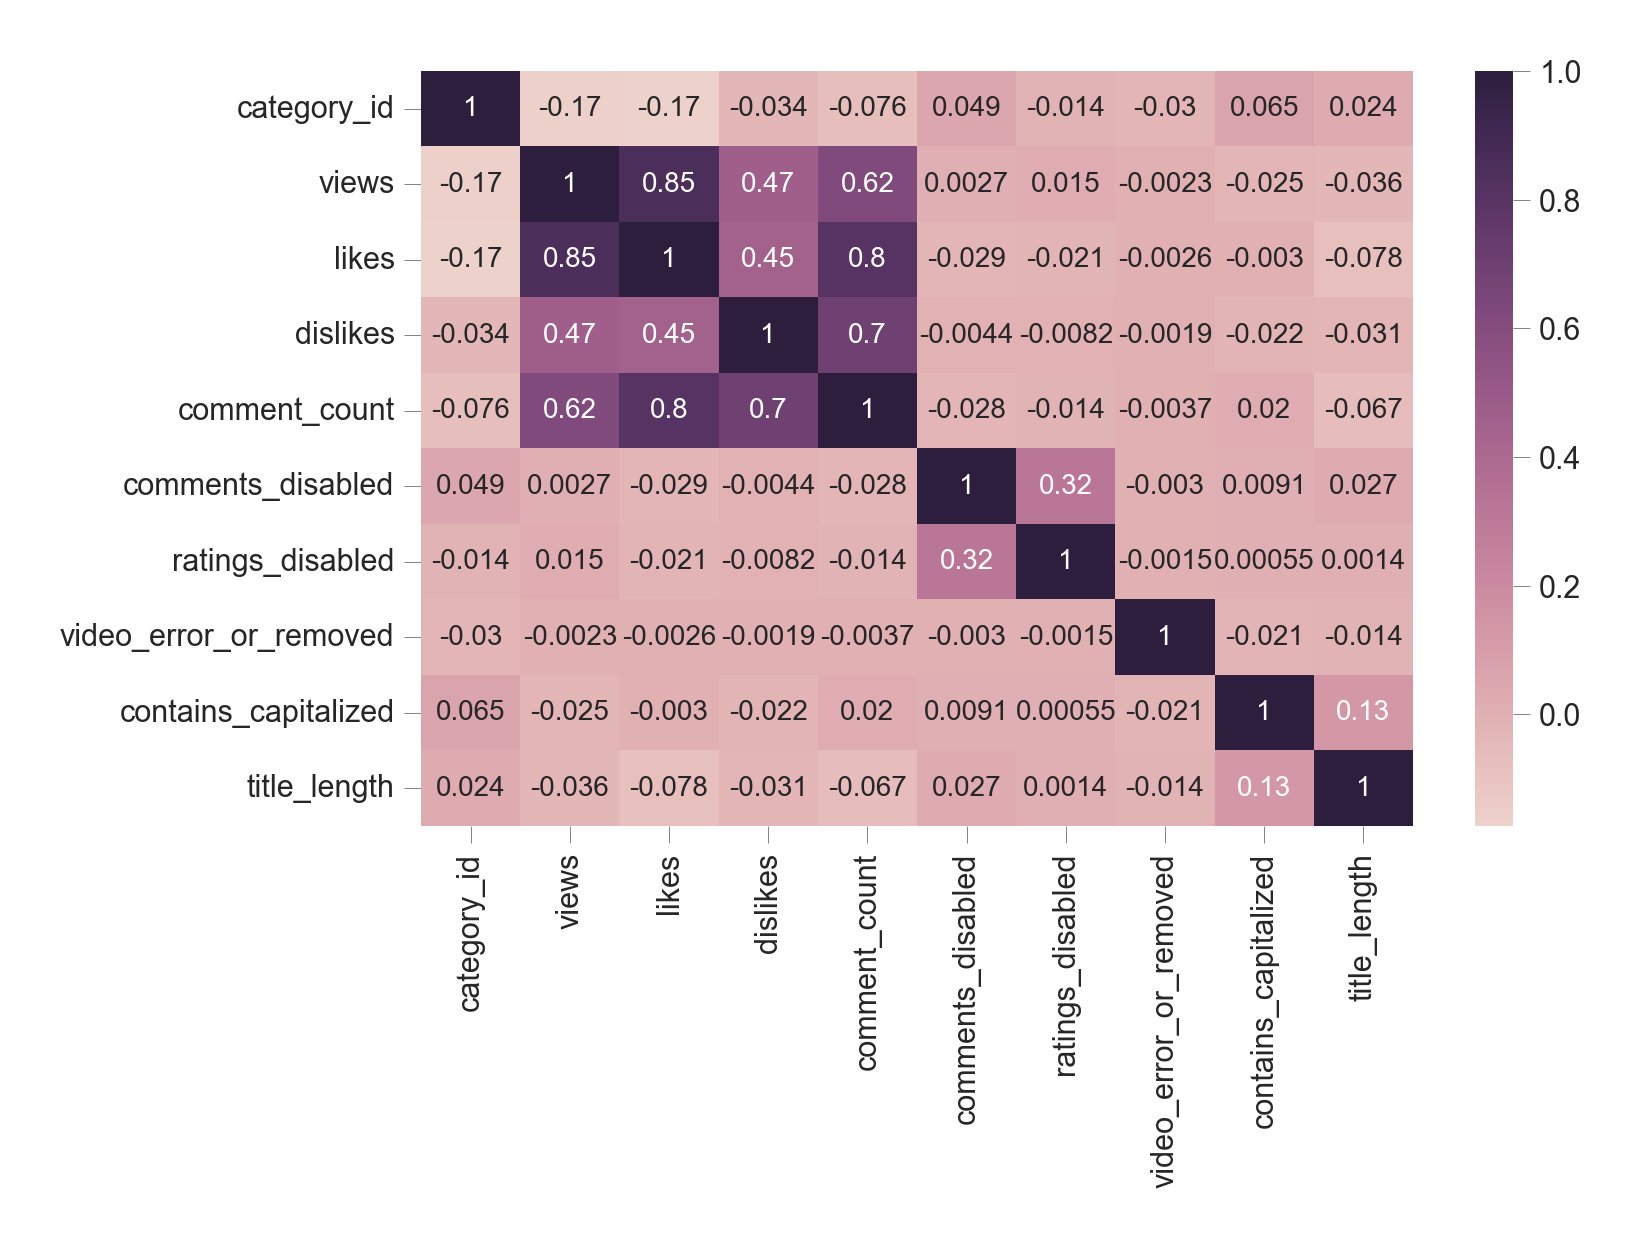

In [45]:
fig, ax = plt.subplots()
_ = sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Let's verify that by plotting a scatter plot between views ans likes to visualize the relationship between these variables.

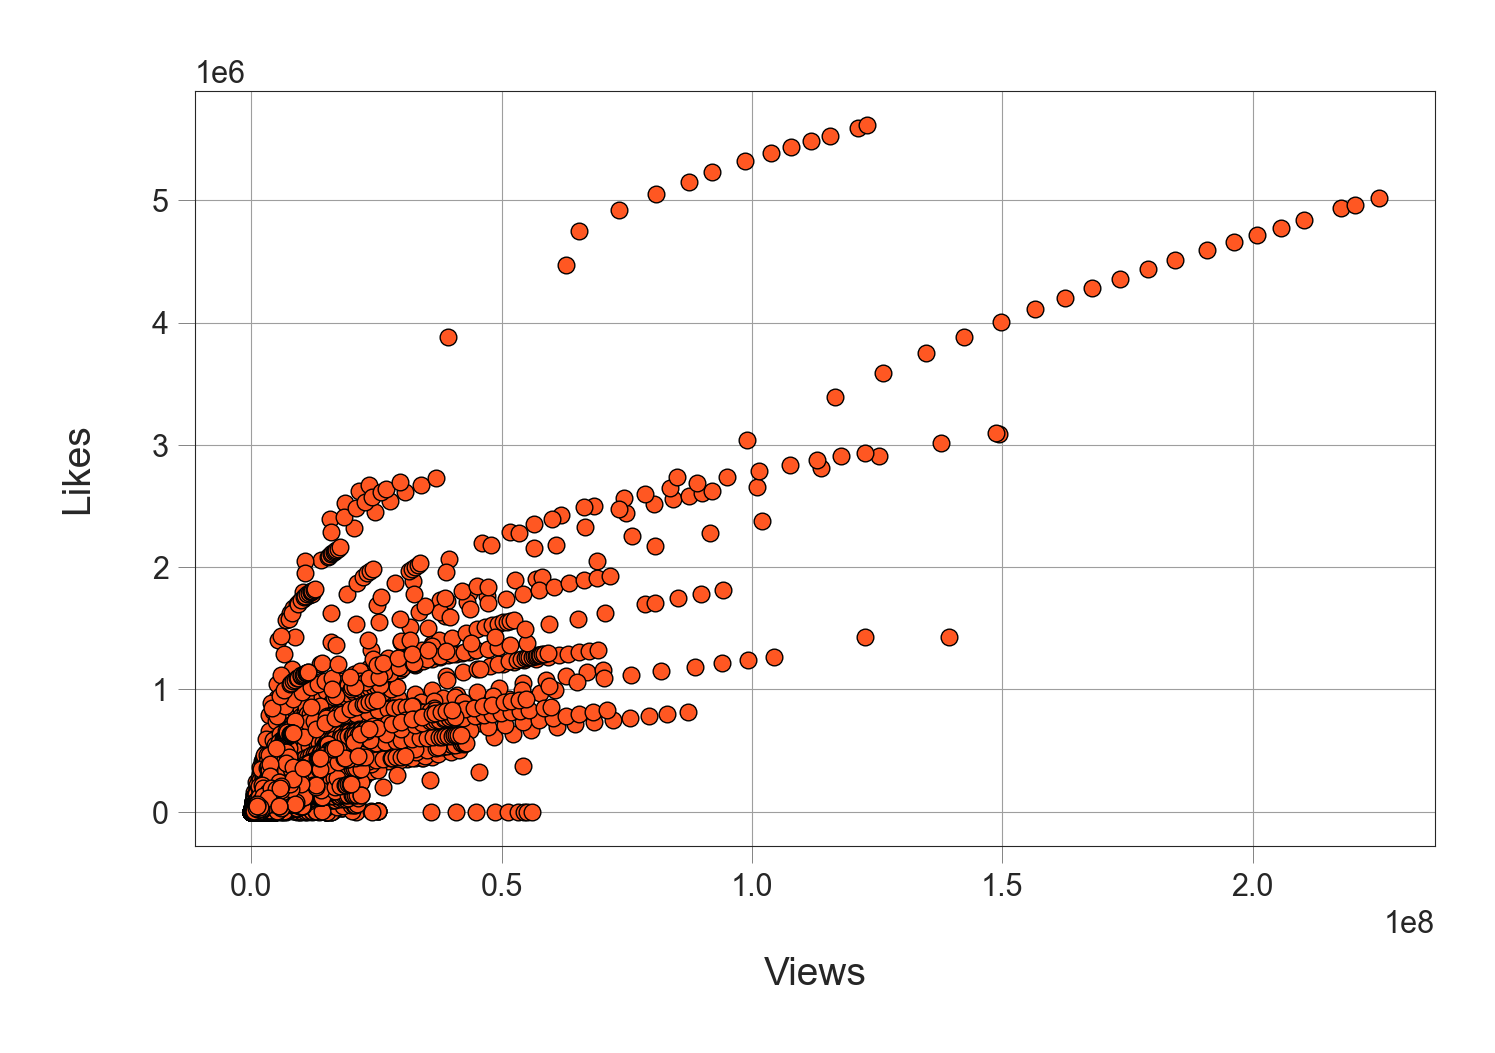

In [47]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors='#000000', linewidths=0.5)
_ = ax.set(xlabel='Views', ylabel='Likes') 

We see that views and likes are truely positively correlated

Most common words in the video titles

In [48]:
from typing import Counter


title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

- '-', '|' symbols occured a lot.  
- 'Video', 'Trailer', ' How' also common in title of trending videos.

__Which channels have the largest number of trending videos?__

In [52]:
cdf = df.groupby('channel_title').size().reset_index(name='video_count').sort_values('video_count', ascending=False).head(20)

In [50]:
cdf

,channel_title,video_count
555,ESPN,203
1785,The Tonight Show Starring Jimmy Fallon,197
1943,Vox,193
1271,Netflix,193
1804,TheEllenShow,193
1753,The Late Show with Stephen Colbert,187
889,Jimmy Kimmel Live,186
1009,Late Night with Seth Meyers,183
1556,Screen Junkies,182
1239,NBA,181


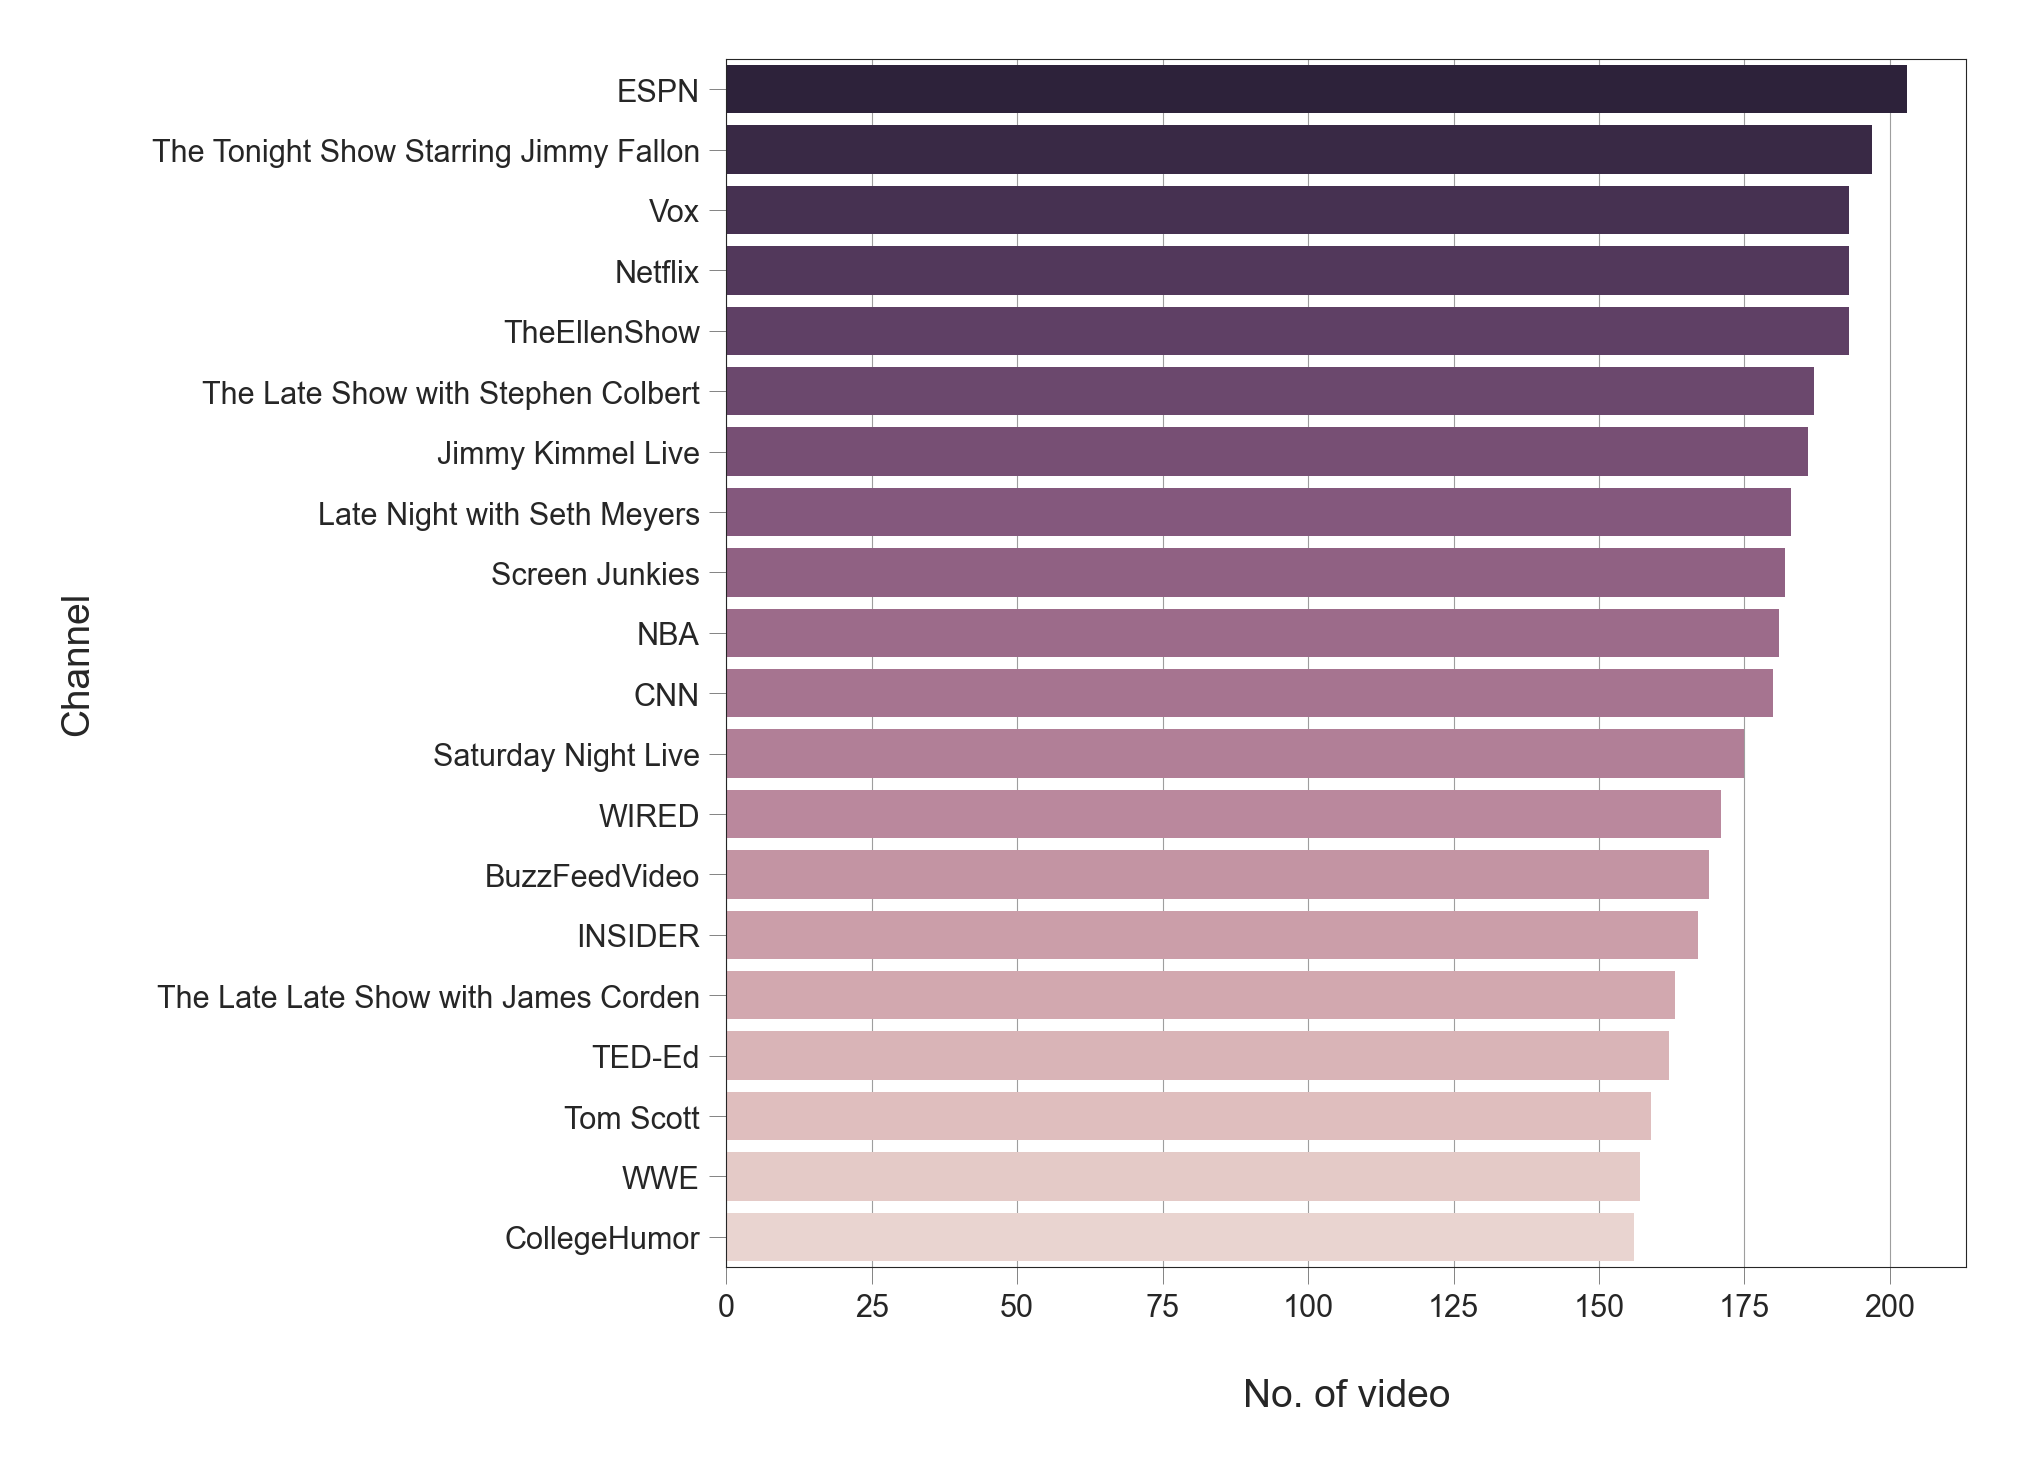

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
_ = sns.barplot(x='video_count', y='channel_title', data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel='No. of video', ylabel='Channel')

__Trending videos and their publishing time__  
Add 2 columns to represent the date  and hour of publishing each video, then dedete 'publish_time' column.

In [58]:
df['publishing_day'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%a'))